# Step 1: Import Libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load the MNIST Dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 3: Preprocess the Data

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Step 4: Build the CNN Model

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

C:\Users\kanchan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 5: Compile the Model


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model

In [6]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.8058 - loss: 0.6306 - val_accuracy: 0.9780 - val_loss: 0.0701
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9704 - loss: 0.1006 - val_accuracy: 0.9878 - val_loss: 0.0446
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9805 - loss: 0.0658 - val_accuracy: 0.9895 - val_loss: 0.0384
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9849 - loss: 0.0505 - val_accuracy: 0.9890 - val_loss: 0.0402
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9871 - loss: 0.0429 - val_accuracy: 0.9895 - val_loss: 0.0393
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9887 - loss: 0.0390 - val_accuracy: 0.9907 - val_loss: 0.0330
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9915 - val_loss: 0.0304
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9911 - loss: 0.0275 - 

# Step 7: Evaluate the Model

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9886 - loss: 0.0339

✅ Test Accuracy: 99.16%


# Step 8: Plot Accuracy and Loss Graphs

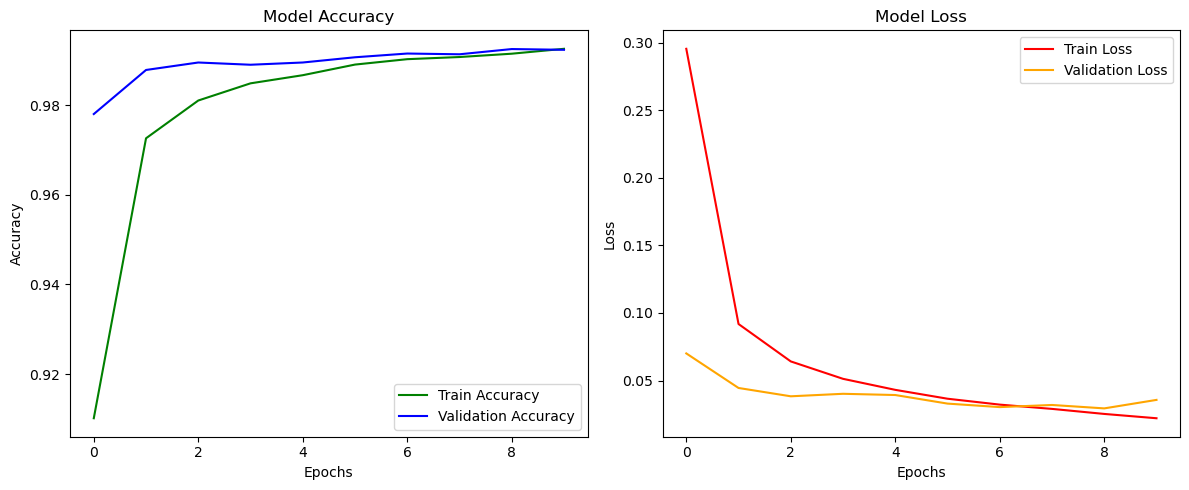

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


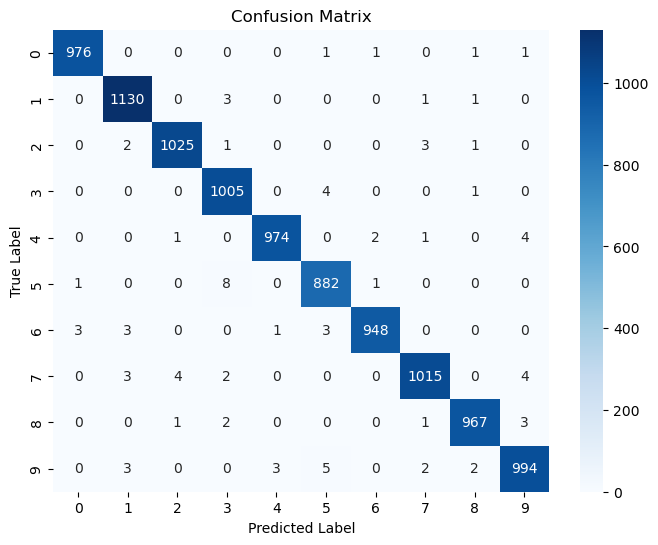

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 10: Classification Report

In [10]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Step 11: Predict and Display Random Handwritten Digits from Test Set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


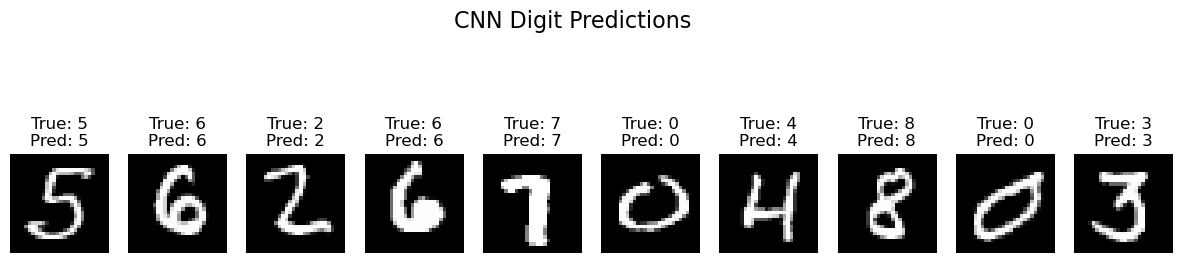

In [12]:
import random

# Pick 10 random test images
num_samples = 10
indices = random.sample(range(len(X_test)), num_samples)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    image = X_test[idx]
    true_label = y_test[idx]
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.suptitle("CNN Digit Predictions", fontsize=16)
plt.show()
